In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import random

from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import accuracy_score, classification_report

In [2]:
# https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ML311-Coursera/labs/Module1/L1/data/digits.csv
digits = pd.read_csv("Digits.csv")
digits.to_csv("Digits.csv", index=False)
labels = digits['label']
digits = np.array(digits.drop('label', axis=1)).astype('float')
digits.shape, labels.shape

((42000, 784), (42000,))

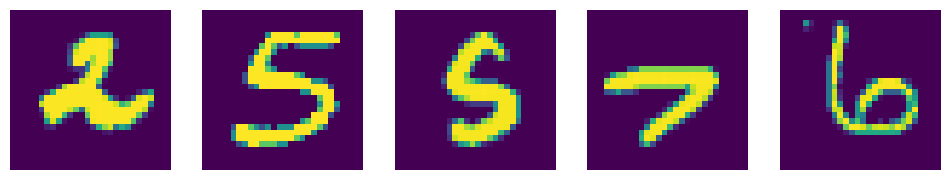

In [4]:
plt.figure(figsize=(12, 8))
for i in range(5):
    plt.subplot(1, 5, i+1)
    plt.imshow(random.choice(digits).reshape(28, 28))
    plt.axis("off")

In [5]:
split = 0.7, 0.3
digits /= 255.0
split_ind = int(len(digits)*split[0])
X_train, X_test, y_train, y_test = digits[:split_ind], digits[split_ind:], labels[:split_ind], labels[split_ind:]
split_ind

29399

In [6]:
X_train.shape, X_test.shape

((29399, 784), (12601, 784))

With scikit-learn's **MLPClassifier**, we can utilize the GridSearch cross validation method to optimize the following parameters:

- **hidden_layer_sizes: _tuple, length = n_layers - 2, default=(100,)_**. The ith element represents the number of neurons in the ith hidden layer.

- **alpha: _float, default=0.0001_**. Strength of the L2 regularization term. The L2 regularization term is divided by the sample size when added to the loss.

- **max_iter: _int, default=200_**. Maximum number of iterations. The solver iterates until convergence (determined by ‘tol’) or this number of iterations. For stochastic solvers (‘sgd’, ‘adam’), note that this determines the number of epochs (how many times each data point will be used), not the number of gradient steps.

- **learning_rate_init: _float, default=0.001_**. The initial learning rate used. It controls the step-size in updating the weights. Only used when solver=’sgd’ or ‘adam’.


In [7]:
model = MLPClassifier().fit(X_train, y_train)
y_pred = model.predict(X_test)
accuracy_score(y_test, y_pred)

0.9711927624791683

In [8]:
print(classification_report(y_pred, y_test))

              precision    recall  f1-score   support

           0       0.98      0.98      0.98      1272
           1       0.99      0.98      0.98      1417
           2       0.97      0.98      0.97      1215
           3       0.96      0.97      0.97      1307
           4       0.97      0.97      0.97      1180
           5       0.96      0.97      0.97      1125
           6       0.98      0.97      0.98      1239
           7       0.97      0.97      0.97      1331
           8       0.97      0.96      0.96      1248
           9       0.95      0.95      0.95      1267

    accuracy                           0.97     12601
   macro avg       0.97      0.97      0.97     12601
weighted avg       0.97      0.97      0.97     12601



For the cross validation training, we will use the default activation "relu" and default solver "adam". Using **RandomizedSearchCV** instead of **GridSearchCV** reduces the training time because in contrast to GridSearchCV, not all parameter values are tried out, but rather a fixed number of parameter settings is sampled from the specified distributions. The following figure illustrates the difference between the two: 

<center><img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ML311-Coursera/labs/Module1/L1/data/randomsearch.png" width="65%"></center>

<p style="text-align:center">
<a href="https://dl.acm.org/doi/pdf/10.5555/2188385.2188395?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkML311Coursera747-2022-01-01"> Source: Random Search for Hyper-Parameter Optimization paper</a>

As you can see, points in the GridSearch space are evenly distributed; thus projections onto either the important or the unimportant parameter subspace produces the same coverage, which is inefficient as we would want the important parameters to have more coverage in the trials. In contrast, the uneven distribution of points in the RandomSearch space allows the trials to explore many more distinct values in the important parameter space. 

Since it's hard to know ahead of time which parameter subspaces are more important, performing a parameter search on a strict, even grid would not be ideal or efficient
However, despite the fact that we will use a more efficient search method since we are trying out multiple values for mutiple parameters of a neural network , **you should still expect training time to be much longer than training a single model**.
.

</p>


In [10]:
parameters = {'hidden_layer_sizes':[50, 100, 200],
              'alpha': [0.001, 0.01, 0.1], 
              'max_iter': [200, 500, 800], 
              'learning_rate_init':[0.0001, 0.001, 0.01, 0.1]}
model = MLPClassifier()
clf = RandomizedSearchCV(estimator=model, param_distributions=parameters, cv=5)
clf.fit(X_train[:3000], y_train[:3000])

print("The best parameter values found are:\n")
print(clf.best_params_)

The best parameter values found are:

{'max_iter': 800, 'learning_rate_init': 0.001, 'hidden_layer_sizes': 200, 'alpha': 0.1}


In [11]:
bestmodel = clf.best_estimator_

The accuracy score of the best model is 0.9345290056344735



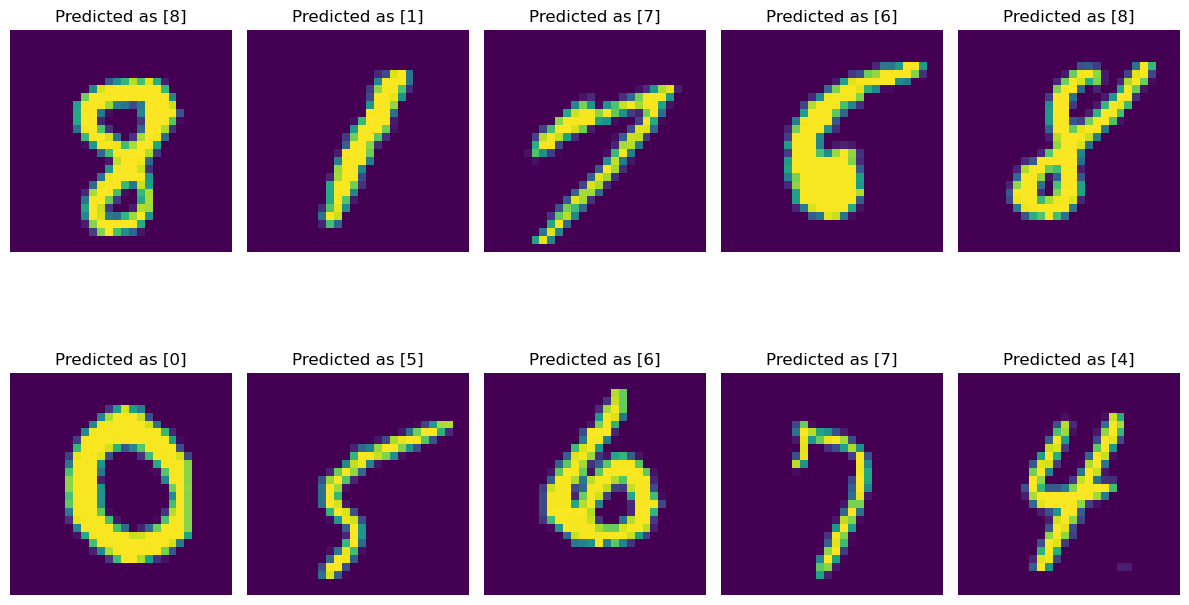

In [12]:
y_pred = bestmodel.predict(X_test)
print(f"The accuracy score of the best model is {accuracy_score(y_test, y_pred)}\n")

plt.figure(figsize=(12, 8))
for i in range(10):
    plt.subplot(2, 5, i+1);
    sample = random.choice(X_test)
    plt.imshow(sample.reshape(28, 28))
    pred = bestmodel.predict(sample.reshape(1, -1));
    plt.title(f"Predicted as {pred}")
    plt.axis("off")

plt.tight_layout()